In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
lead = pd.read_csv("Leads.csv")
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [0]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [0]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [0]:
lead.columns = lead.columns.str.strip().str.replace(' ', '_')
#Finding Unique values in each column
lead.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     19
How_did_you_hear_about_X_Education                 10
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

In [0]:
#Target Variable 
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [0]:
#select means no option is selected so converting it to "Null" Value
lead=lead.replace('Select',np.nan)

# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [0]:
#dropping columns which have more than 35% null values except specialization
lead = lead.drop(['Asymmetrique_Profile_Index','Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score','Lead_Profile','Tags','Lead_Quality','How_did_you_hear_about_X_Education','City'],axis=1)

In [0]:
#We will now remove columns with single value
lead.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     18
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article                                   2
X_Education_Forums          

In [0]:
# dropping columns which are single valued
lead=lead.drop(['Magazine','Receive_More_Updates_About_Our_Courses','I_agree_to_pay_the_amount_through_cheque','Get_updates_on_DM_Content','Update_me_on_Supply_Chain_Content'],axis=1)


In [0]:
#dropping lead no. as it performs same function as Prospect Id
lead=lead.drop(['Lead_Number'],axis=1)

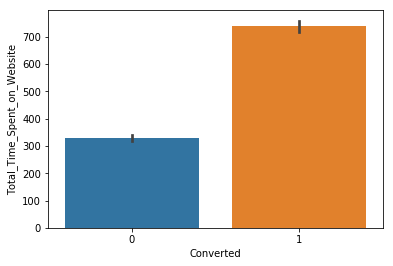

In [0]:
#checking continuous variable against target variable
sns.barplot(x=lead['Converted'],y=lead['Total_Time_Spent_on_Website'])

As there is good amount of variance so 'Total_Time_Spent_on_Website' can be a good predictor

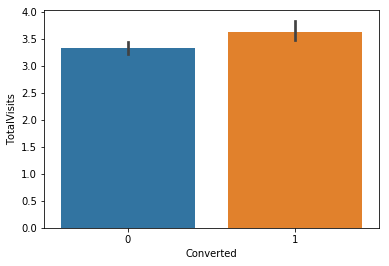

In [0]:
sns.barplot(x=lead['Converted'],y=lead['TotalVisits']) 

As there is no significant variance so 'TotalVisits' variable may not be good predictor

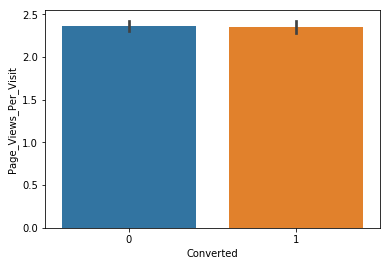

In [0]:
sns.barplot(x=lead['Converted'],y=lead['Page_Views_Per_Visit']) 

As there is no significant variance so 'Page_Views_Per_Visit' variable may not be good predictor

In [0]:
#checking categorical variable
print(lead["Lead_Origin"].value_counts())
print('NaN count', lead["Lead_Origin"].isnull().sum())
# Lead import and quick have very few enteries so it would be good to merge it with other categories or remove these record

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64
NaN count 0


In [0]:
print(lead["Lead_Source"].value_counts())
print('NaN count', lead["Lead_Source"].isnull().sum())
# many categories have very few enteries so it would be good to merge them with other categories or remove these record

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
blog                    1
testone                 1
Name: Lead_Source, dtype: int64
NaN count 36


In [0]:
print(lead["Do_Not_Email"].value_counts())
print('NaN count', lead["Do_Not_Email"].isnull().sum())


No     8506
Yes     734
Name: Do_Not_Email, dtype: int64
NaN count 0


In [0]:
print(lead["Do_Not_Call"].value_counts())
print('NaN count', lead["Do_Not_Call"].isnull().sum())


No     9238
Yes       2
Name: Do_Not_Call, dtype: int64
NaN count 0


In [0]:
print(lead["Country"].value_counts())
print('NaN count', lead["Country"].isnull().sum())
# many categories have very few enteries so it would be good to merge them with other categories or create new category for them
#NaN  can be clubbed to make new category "Not Declared"

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
Bangladesh                 2
China                      2
Uganda                     2
Netherlands                2
Ghana                      2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Liberia                    1
Vietnam                    1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Sri Lanka                  1
Kenya         

In [0]:
print(lead["Specialization"].value_counts())
print('NaN count', lead["Specialization"].isnull().sum())

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
NaN count 3380


In [0]:
print(lead["What_is_your_current_occupation"].value_counts())
print('NaN count', lead["What_is_your_current_occupation"].isnull().sum())
##categories less than 100 should be removed to make it significant
##instead of dropping "NaN", they can be assigned new category "not declared"

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64
NaN count 2690


In [0]:
print(lead["What_matters_most_to_you_in_choosing_a_course"].value_counts())
print('NaN count', lead["What_matters_most_to_you_in_choosing_a_course"].isnull().sum())

# Flexibility & Convenience and Other should be removed

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64
NaN count 2709


In [0]:
print(lead["Search"].value_counts())
print('NaN count', lead["Search"].isnull().sum())
#"yes" has only 14 records so it would be better to drop the variable

No     9226
Yes      14
Name: Search, dtype: int64
NaN count 0


In [0]:
print(lead["Newspaper_Article"].value_counts())
print('NaN count', lead["Newspaper_Article"].isnull().sum())
#drop the variable

No     9238
Yes       2
Name: Newspaper_Article, dtype: int64
NaN count 0


In [0]:
print(lead["X_Education_Forums"].value_counts())
print('NaN count', lead["X_Education_Forums"].isnull().sum())
#drop the variable

No     9239
Yes       1
Name: X_Education_Forums, dtype: int64
NaN count 0


In [0]:
print(lead["Newspaper"].value_counts())
print('NaN count', lead["Newspaper"].isnull().sum())
#drop the variable

No     9239
Yes       1
Name: Newspaper, dtype: int64
NaN count 0


In [0]:
print(lead["Digital_Advertisement"].value_counts())
print('NaN count', lead["Digital_Advertisement"].isnull().sum())
#drop the variable

No     9236
Yes       4
Name: Digital_Advertisement, dtype: int64
NaN count 0


In [0]:
print(lead["Through_Recommendations"].value_counts())
print('NaN count', lead["Through_Recommendations"].isnull().sum())
#drop the variable

No     9233
Yes       7
Name: Through_Recommendations, dtype: int64
NaN count 0


In [0]:
print(lead["A_free_copy_of_Mastering_The_Interview"].value_counts())
print('NaN count', lead["A_free_copy_of_Mastering_The_Interview"].isnull().sum())
#keep the variable

No     6352
Yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64
NaN count 0


In [0]:
print(lead["Last_Notable_Activity"].value_counts())
print('NaN count', lead["Last_Notable_Activity"].isnull().sum())
#drop the categories with records less than 100

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Approached upfront                 1
Name: Last_Notable_Activity, dtype: int64
NaN count 0


In [0]:
print(lead["Last_Activity"].value_counts())
print('NaN count', lead["Last_Activity"].isnull().sum())
#it does not add much information as same thing is captured in the "last notable activity" variable

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64
NaN count 103


In [0]:
print(lead.shape)

lead.head()

(9240, 22)


,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,...,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [0]:
#Assigning categories to NaN and clubbing others as discussed in above analysis
lead['Lead_Source'].replace('google','Google', inplace=True)
lead['Lead_Source'].replace('Welingak Website','others', inplace=True)
lead['Lead_Source'].replace('Referral Sites','others', inplace=True)
lead['Lead_Source'].replace('Reference','others', inplace=True)
lead['Specialization'].replace('Select','not declared', inplace=True) 
lead['What_matters_most_to_you_in_choosing_a_course'].fillna('not declared', inplace=True)
lead['Country'].fillna('not declared', inplace=True)
lead['Specialization'].fillna('not declared', inplace=True) 
lead['What_is_your_current_occupation'].fillna('not declared', inplace=True)

In [0]:
#clubbing the countries other than India and making new category "Outside India"
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not declared":
        category = "Not Declared"
    else:
        category = "Outside India"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)

In [0]:
#as discussed in category analysis here we will drop the categories in various variables

few_entries=lead[(lead['Lead_Source']=='bing') | (lead['Lead_Source']=='Facebook') | (lead['Lead_Source']=='Click2call') | 
                 (lead['Lead_Source']=='Press_Release') |
             (lead['Lead_Source']=='Social Media') | (lead['Lead_Source']=='Live Chat') | (lead['Lead_Source']=='blog') | 
             (lead['Lead_Source']=='youtubechannel') | (lead['Lead_Source']=='NC_EDM') | (lead['Lead_Source']=='testone') |
            (lead['Lead_Source']=='WeLearn') | (lead['Lead_Source']=='Pay per Click Ads') | (lead['Lead_Source']=='welearnblog_Home')|
           (lead['Lead_Origin']=='Quick Add Form')|(lead['Lead_Origin']=='Lead Import') |(lead['What_is_your_current_occupation']=='Other') |
                 (lead['What_is_your_current_occupation']=='Housewife') 
           |(lead['What_is_your_current_occupation']=='Businessman')  |(lead['What_matters_most_to_you_in_choosing_a_course']=='Flexibility & Convenience')  |
                 (lead['What_matters_most_to_you_in_choosing_a_course']=='Other')
            |(lead['Last_Notable_Activity']=='Unsubscribed') |(lead['Last_Notable_Activity']=='Email Bounced') |(lead['Last_Notable_Activity']=='Unreachable ')
            |(lead['Last_Notable_Activity']=='Had a Phone Conversation') |(lead['Last_Notable_Activity']=='Email Marked Spam ') |(lead['Last_Notable_Activity']=='Approached upfront')
            |(lead['Last_Notable_Activity']=='Form Submitted on Website') |(lead['Last_Notable_Activity']=='Resubscribed to emails') |(lead['Last_Notable_Activity']=='View in browser link Clicked')
            |(lead['Last_Notable_Activity']=='Email Received')|(lead['Last_Notable_Activity']=='Unreachable')|(lead['Last_Notable_Activity']=='Unreachable')
             | (lead['Specialization']=='Services Excellence')].index

lead=lead.drop(few_entries)

In [0]:
#dropping the non significant variables as disscussed above
colll=['Search','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
      'Through_Recommendations','Do_Not_Call','Last_Activity']
lead =lead.drop(columns=colll, axis=0)

In [0]:
lead.shape

(8927, 14)

In [0]:
#checking the null values 
print(((lead.isnull().sum()/len(lead))*100).sort_values(ascending=False),'%')

Page_Views_Per_Visit                             1.221015
TotalVisits                                      1.221015
Lead_Source                                      0.358463
Last_Notable_Activity                            0.000000
A_free_copy_of_Mastering_The_Interview           0.000000
What_matters_most_to_you_in_choosing_a_course    0.000000
What_is_your_current_occupation                  0.000000
Specialization                                   0.000000
Country                                          0.000000
Total_Time_Spent_on_Website                      0.000000
Converted                                        0.000000
Do_Not_Email                                     0.000000
Lead_Origin                                      0.000000
Prospect_ID                                      0.000000
dtype: float64 %


 ## Exploratory Data Analysis: Frequency plot for converted~each feature

Plotting each of the 12 vfeatures, against Converted and looking at the frequency of leads

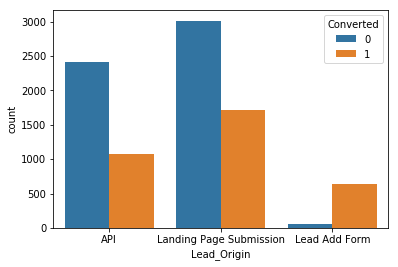

In [0]:
sns.countplot(x='Lead_Origin', hue='Converted', data=lead)

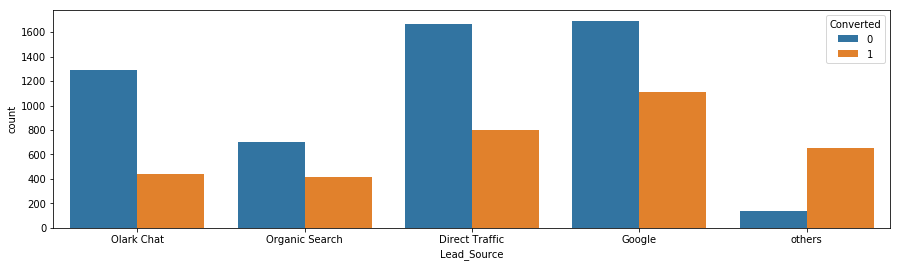

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(x='Lead_Source', hue='Converted', data=lead)

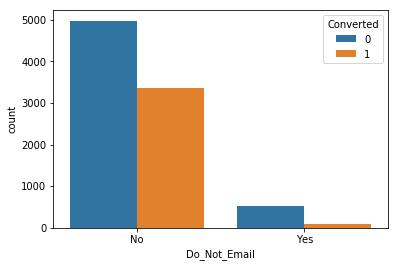

In [0]:
sns.countplot(x='Do_Not_Email', hue='Converted', data=lead)

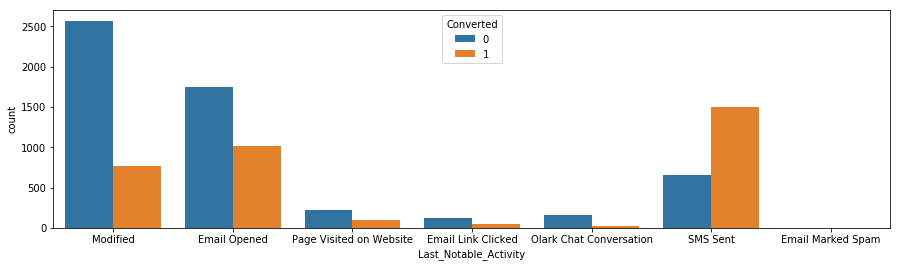

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(x='Last_Notable_Activity', hue='Converted', data=lead)

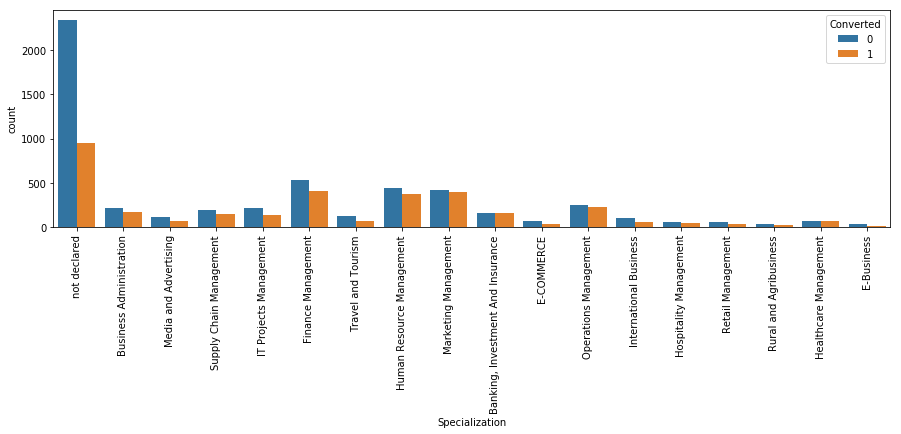

In [0]:
plt.figure(figsize=(15,4))
plott=sns.countplot(x='Specialization', hue='Converted', data=lead)
for item in plott.get_xticklabels():
    item.set_rotation(90)

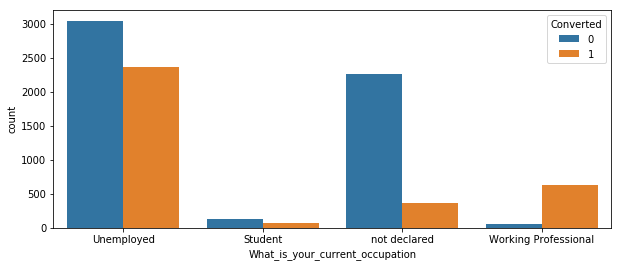

In [0]:
plt.figure(figsize=(10,4))
sns.countplot(x='What_is_your_current_occupation', hue='Converted', data=lead)

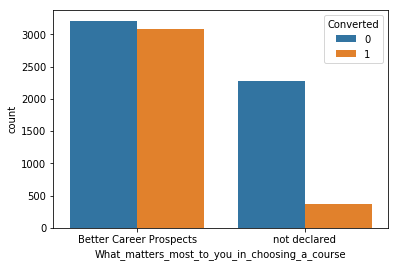

In [0]:
sns.countplot(x='What_matters_most_to_you_in_choosing_a_course', hue='Converted', data=lead)

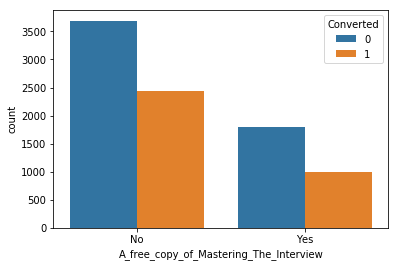

In [0]:
sns.countplot(x='A_free_copy_of_Mastering_The_Interview', hue='Converted', data=lead)

In [0]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8927 entries, 0 to 9239
Data columns (total 14 columns):
Prospect_ID                                      8927 non-null object
Lead_Origin                                      8927 non-null object
Lead_Source                                      8895 non-null object
Do_Not_Email                                     8927 non-null object
Converted                                        8927 non-null int64
TotalVisits                                      8818 non-null float64
Total_Time_Spent_on_Website                      8927 non-null int64
Page_Views_Per_Visit                             8818 non-null float64
Country                                          8927 non-null object
Specialization                                   8927 non-null object
What_is_your_current_occupation                  8927 non-null object
What_matters_most_to_you_in_choosing_a_course    8927 non-null object
A_free_copy_of_Mastering_The_Interview           8927

### Numeric variables 

In [0]:
numeric=lead[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,8818.000000,8927.000000,8818.000000
mean,3.440916,487.505769,2.359695
std,4.886250,548.219655,2.159544
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,938.000000,3.000000
90%,7.000000,1379.000000,5.000000
99%,17.000000,1840.740000,9.000000
max,251.000000,2272.000000,55.000000


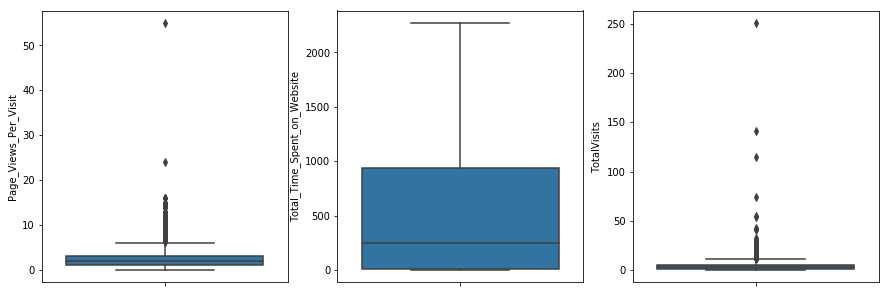

In [0]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y='Page_Views_Per_Visit', data=numeric)
plt.subplot(1,3,2)
sns.boxplot(y='Total_Time_Spent_on_Website', data=numeric)
plt.subplot(1,3,3)
sns.boxplot(y='TotalVisits', data=numeric)
plt.show()

As you can see we dont see a pretty decent distribution across the percentiles. 
Infact we can see outliers in case of totalvisits and Page_views_per_visit.
Also the Total_Time_Spent_on_Website varies quite a lot making it not that good a predictor.

In [0]:
##checking the nulls 
print(((lead.isnull().sum()/len(lead))*100).sort_values(ascending=False),'%')

Page_Views_Per_Visit                             1.221015
TotalVisits                                      1.221015
Lead_Source                                      0.358463
Last_Notable_Activity                            0.000000
A_free_copy_of_Mastering_The_Interview           0.000000
What_matters_most_to_you_in_choosing_a_course    0.000000
What_is_your_current_occupation                  0.000000
Specialization                                   0.000000
Country                                          0.000000
Total_Time_Spent_on_Website                      0.000000
Converted                                        0.000000
Do_Not_Email                                     0.000000
Lead_Origin                                      0.000000
Prospect_ID                                      0.000000
dtype: float64 %


In [0]:
## drop the nulls
lead.dropna(axis=0, inplace=True)

In [0]:
print(lead.shape)
print(lead.info())

(8792, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8792 entries, 0 to 9239
Data columns (total 14 columns):
Prospect_ID                                      8792 non-null object
Lead_Origin                                      8792 non-null object
Lead_Source                                      8792 non-null object
Do_Not_Email                                     8792 non-null object
Converted                                        8792 non-null int64
TotalVisits                                      8792 non-null float64
Total_Time_Spent_on_Website                      8792 non-null int64
Page_Views_Per_Visit                             8792 non-null float64
Country                                          8792 non-null object
Specialization                                   8792 non-null object
What_is_your_current_occupation                  8792 non-null object
What_matters_most_to_you_in_choosing_a_course    8792 non-null object
A_free_copy_of_Mastering_The_Interview    

## Normalising the Numerical Variables

In [0]:
cnames = ["TotalVisits","Total_Time_Spent_on_Website","Page_Views_Per_Visit"]

We perform minmax normalization 

In [0]:
#normalization
for i in cnames:
    print(i)
    lead[i] = (lead[i]-min(lead[i]))/(max(lead[i])-min(lead[i]))

TotalVisits
Total_Time_Spent_on_Website
Page_Views_Per_Visit


## Creating Dummy Variables

We drop those variables for which either a category is created or it is "Not Declared"

In [0]:

lead['Lead_Origin'].value_counts()
origin=pd.get_dummies(lead['Lead_Origin'],prefix='orgn')
origin=origin.drop('orgn_Lead Add Form', axis=1)

lead['Lead_Source'].value_counts()
source=pd.get_dummies(lead['Lead_Source'],prefix='src')
source=source.drop('src_others', axis=1)

lead['Do_Not_Email'].value_counts()
DNE=pd.get_dummies(lead['Do_Not_Email'],drop_first=True, prefix='dne')

lead['Specialization'].value_counts()
spcial=pd.get_dummies(lead['Specialization'],prefix='spcl')
spcial=spcial.drop('spcl_not declared', axis=1)

lead['What_is_your_current_occupation'].value_counts()
occupation=pd.get_dummies(lead['What_is_your_current_occupation'],prefix='occ')
occupation=occupation.drop('occ_not declared', axis=1)

lead['What_matters_most_to_you_in_choosing_a_course'].value_counts()
what=pd.get_dummies(lead['What_matters_most_to_you_in_choosing_a_course'],prefix='what')
what=what.drop('what_not declared', axis=1)

lead['A_free_copy_of_Mastering_The_Interview'].value_counts()
intrvw=pd.get_dummies(lead['A_free_copy_of_Mastering_The_Interview'],prefix='intrvw',drop_first=True)

lead['Last_Notable_Activity'].value_counts()
last_note=pd.get_dummies(lead['Last_Notable_Activity'],prefix='last_note')
last_note=last_note.drop('last_note_Email Link Clicked', axis=1)

lead['Country'].value_counts()
cntry=pd.get_dummies(lead['Country'],prefix='country')
cntry=cntry.drop('country_Not Declared', axis=1)

Combining the categorical variables (after dummy variables have been created) with numerical variables and response variable( "Converted").

In [0]:
leadn=lead.drop(columns=['Prospect_ID'], axis=1)
leadncol=['Converted','TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']
final=pd.concat([leadn[leadncol],origin,source,DNE,spcial,occupation,what,intrvw,last_note,cntry], axis=1)
final.shape

(8792, 41)

In [0]:
final.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,orgn_API,orgn_Landing Page Submission,src_Direct Traffic,src_Google,src_Olark Chat,src_Organic Search,...,what_Better Career Prospects,intrvw_Yes,last_note_Email Marked Spam,last_note_Email Opened,last_note_Modified,last_note_Olark Chat Conversation,last_note_Page Visited on Website,last_note_SMS Sent,country_India,country_Outside India
0,0,0.000000,0.000000,0.000000,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,1,0.007968,0.674296,0.036364,0,1,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
3,0,0.003984,0.134243,0.018182,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0.007968,0.628521,0.018182,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


We finally are left with total of 42 variables after data cleaning and eda.

## Train and Test Split

Keeping a train-test split ratio of 0.7

In [0]:
from sklearn.model_selection import train_test_split
x=final.drop('Converted', axis=1)
y=final['Converted']

In [0]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=1000)

Checking correlation 

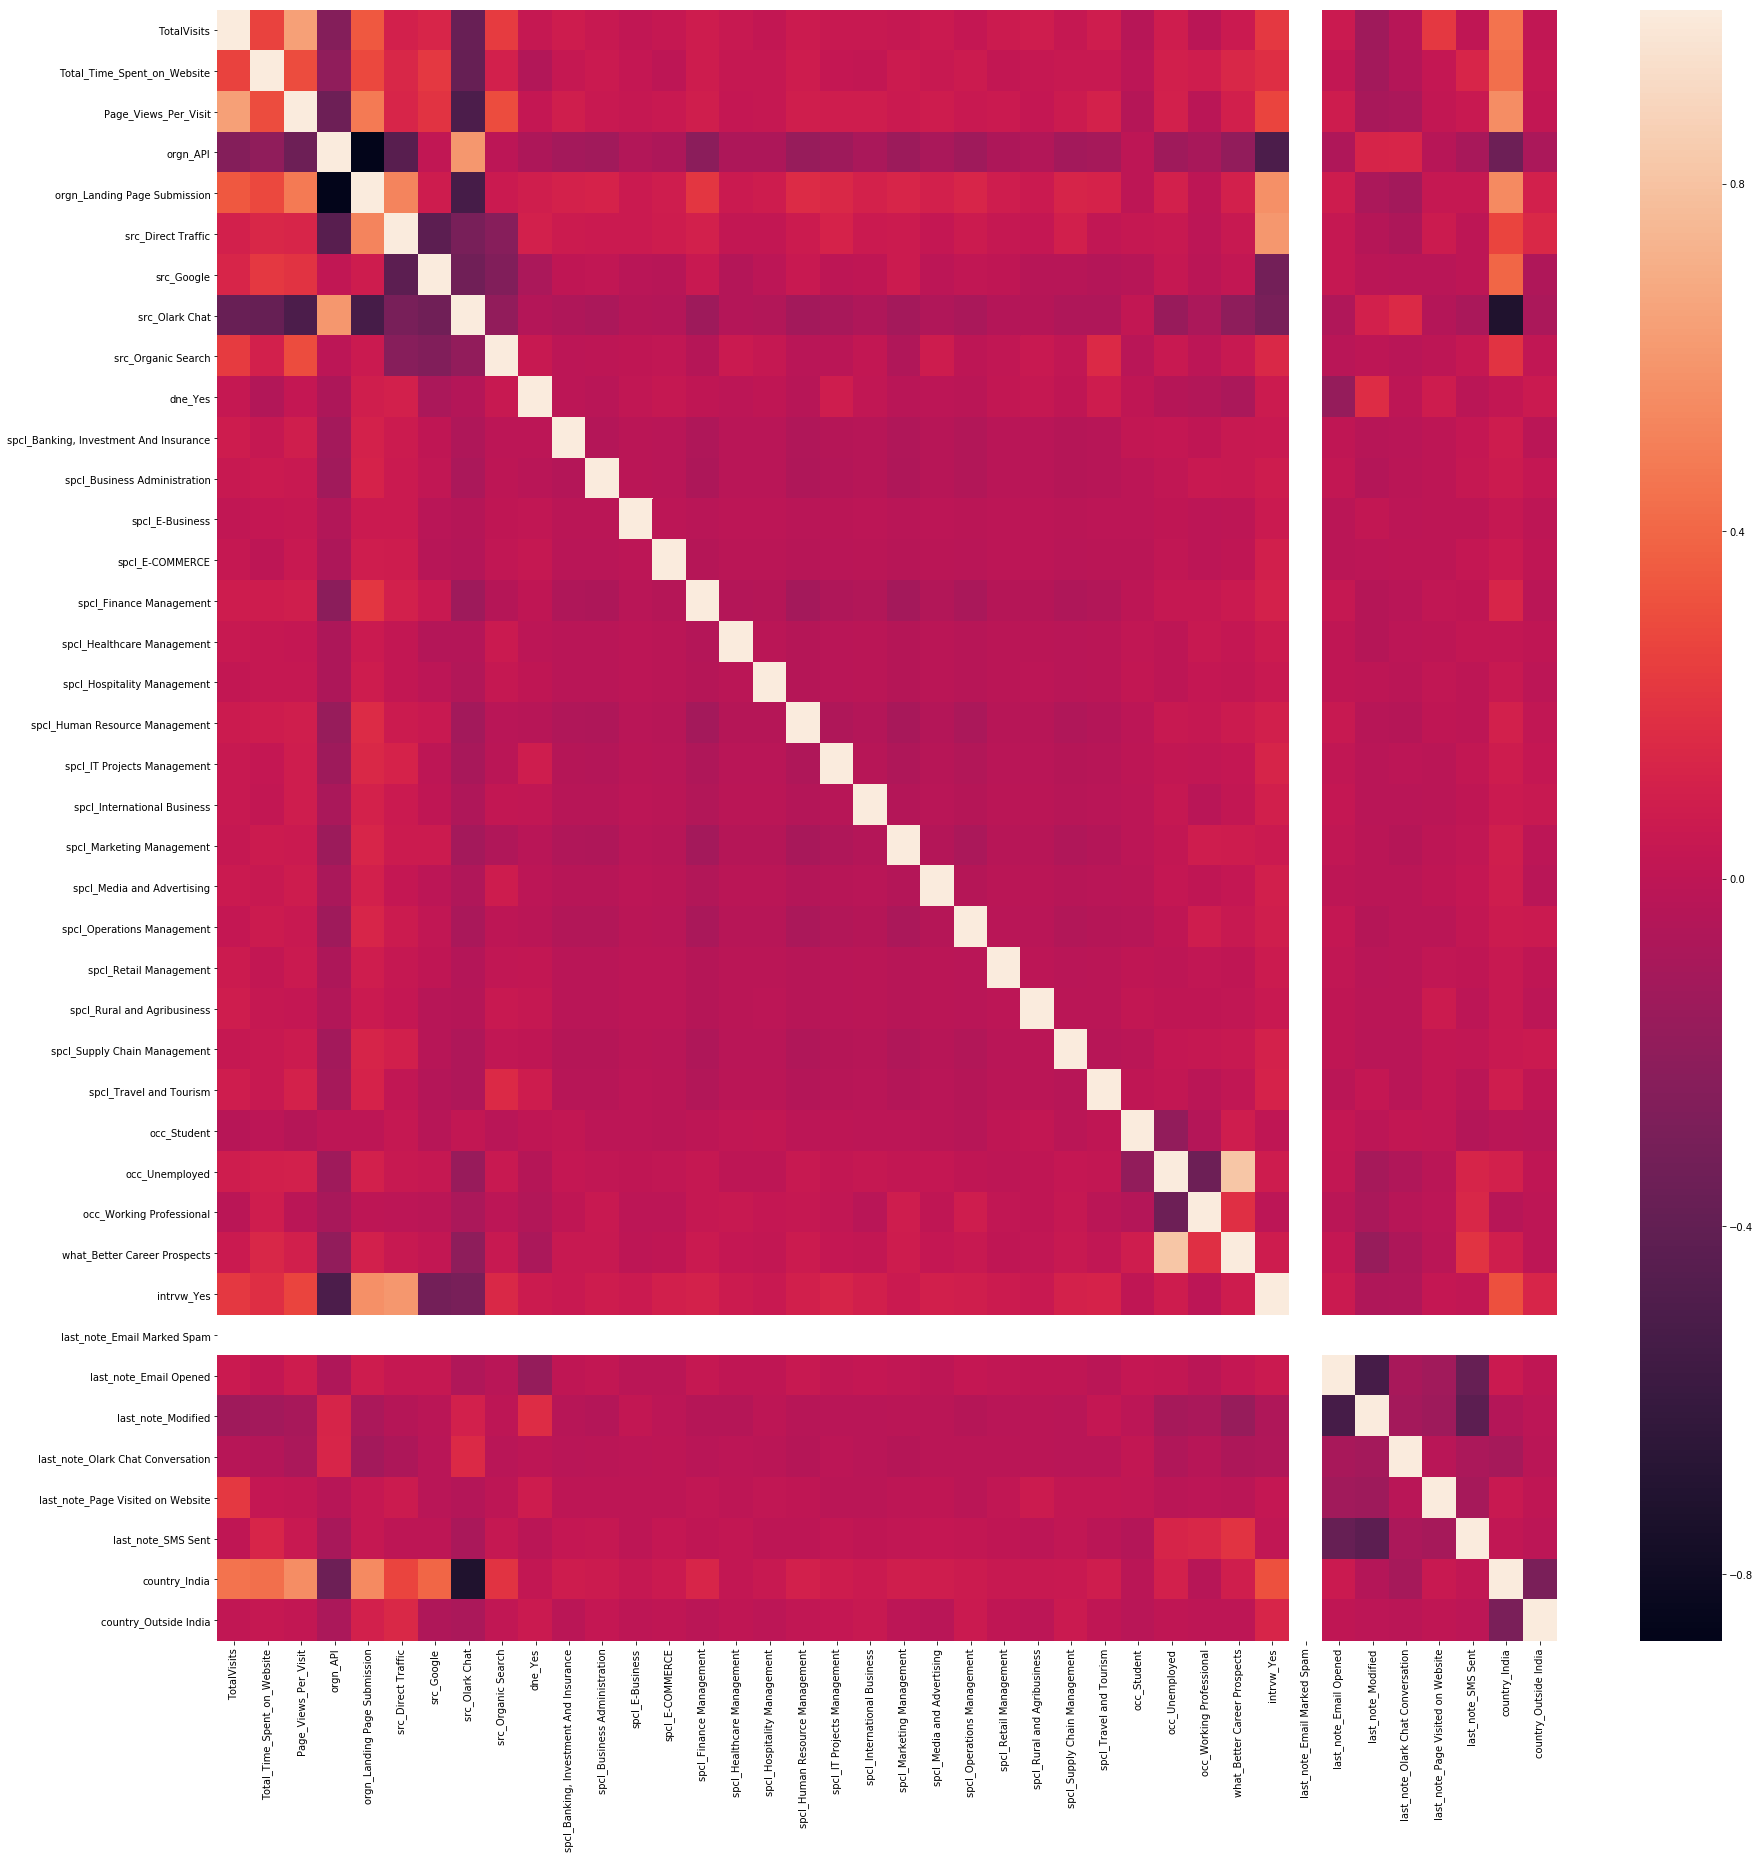

In [0]:

plt.figure(figsize=(30,30))
sns.heatmap(x_train.corr())

From the correlation plot one can see, some variables are highly correlated such as last_note_email_marked_spam with all other variables.
Also very high negative correlation is evident in country india and src_Olark chat possibly because of Olark chat not being used in India.
Other variable pairs inlcudes : org_api and org_landing page submission.

## Building Model Logistic Regression

As there are total 42 variables, its not feasible to check each one.
So RFE is chosen to get the significant and important variables.

### Doing RFE to get significant variables only

In [0]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)   # running RFE with 30 variables as output
rfe = rfe.fit(x,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True  True  True False False False False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True False  True  True  True False  True False  True  True
 False  True  True  True]
[ 1  1  1  1  1  4  8  9  7  1  1  1  1  1  1  1 10  1  1  1  1  1  1  3
  1  1  1  2  1  1  1 11  1  5  1  1  6  1  1  1]


In [0]:
##top 30 variables chosen by RFE analysis
df=pd.DataFrame(list(x))
dfs=pd.DataFrame(rfe.support_)
dfs.rename(columns={0:'sup'}, inplace=True)
dffs=pd.concat([df,dfs], axis=1)
colnm=list(dffs[dffs['sup']==True][0])
colnm

['TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit',
 'orgn_API',
 'orgn_Landing Page Submission',
 'dne_Yes',
 'spcl_Banking, Investment And Insurance',
 'spcl_Business Administration',
 'spcl_E-Business',
 'spcl_E-COMMERCE',
 'spcl_Finance Management',
 'spcl_Healthcare Management',
 'spcl_Human Resource Management',
 'spcl_IT Projects Management',
 'spcl_International Business',
 'spcl_Marketing Management',
 'spcl_Media and Advertising',
 'spcl_Operations Management',
 'spcl_Rural and Agribusiness',
 'spcl_Supply Chain Management',
 'spcl_Travel and Tourism',
 'occ_Unemployed',
 'occ_Working Professional',
 'what_Better Career Prospects',
 'last_note_Email Marked Spam',
 'last_note_Modified',
 'last_note_Olark Chat Conversation',
 'last_note_SMS Sent',
 'country_India',
 'country_Outside India']

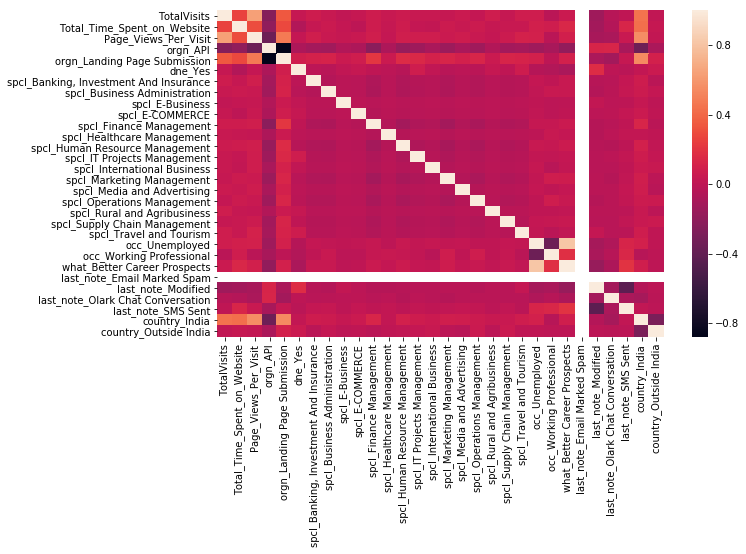

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train[colnm].corr())

### Building model with these 30 variables and taking non-significant varibles out of the model one by one 

In [0]:
colnm = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration', 'spcl_E-Business',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional', 'what_Working Professional', 'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[colnm]), family=sm.families.Binomial())
logm1.fit().summary()

In [0]:
colnm = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional', 'what_Working Professional', 'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

#dropping non significant varibles and rebuilding model


import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[colnm]), family=sm.families.Binomial())
logm1.fit().summary()

In [0]:
#VIF values  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
#dataframe of variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[colnm].columns
vif['VIF'] = [variance_inflation_factor(x_train[colnm].values, i) for i in range(x_train[colnm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [0]:
colnm = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional',  'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

#dropping non significant varibles and rebuilding model

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[colnm]), family=sm.families.Binomial())
logm1.fit().summary()

In [0]:
#dataframe of variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[colnm].columns
vif['VIF'] = [variance_inflation_factor(x_train[colnm].values, i) for i in range(x_train[colnm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [0]:
colnm = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional',  'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_Outside India']

#dropping non significant varibles and rebuilding model,

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[colnm]), family=sm.families.Binomial())
logm1.fit().summary()

In [0]:
#dataframe of variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[colnm].columns
vif['VIF'] = [variance_inflation_factor(x_train[colnm].values, i) for i in range(x_train[colnm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Predicting class for the Test data set

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logm2 = LogisticRegression()
logm2.fit(x_train[colnm], y_train)
logm2.coef_

In [0]:
print(x_train[colnm].shape)
print(x_test[colnm].shape)

In [0]:
logm2.predict_proba(x_train[colnm])

### Assigning Lead Score

In [0]:
#assigning lead score between 0 to 100
y_predict=logm2.predict_proba(x_test[colnm])
y_predict=pd.DataFrame(y_predict)
y_predict = y_predict.iloc[:,[1]]
y_predict.rename(columns={1:'predicted'}, inplace=True)
y_predict.index=y_test.index
y_prob=pd.concat([y_test,y_predict], axis=1)
y_prob['predicted']=y_prob['predicted'].map(lambda x: 0 if x<0.5 else 1)
lead_score=pd.DataFrame(logm2.predict_proba(x_test[colnm]))
lead_score=round(100*(lead_score.iloc[:,[1]]),0)
lead_score.rename(columns={1:'lead_score'}, inplace=True)
lead_score.head()

## Evaluating the Model

In [0]:
#accuracy
round(metrics.accuracy_score(y_prob.Converted, y_prob.predicted),2)

### ROC Curve

In [0]:
#evaluating model using ROC curve


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_prob.Converted,y_prob.predicted)

## Error Metrics

### Confusion Matrix

In [0]:
confusion = metrics.confusion_matrix( y_prob.Converted, y_prob.predicted )
confusion

In [0]:
tp= 1421 
fn= 223  
fp= 287
tn= 707

In [0]:
print('Accuracy                ---  ', round((tp+tn)*100/(tp+tn+fp+fn),2),'%')
print('Specificity             ---  ', round((tn)*100/(tn+fp),2),'%')
print('sensitivity/TPR/Recall  ---  ', round((tp)*100/(tp+fn),2),'%')
print('FPR                     ---  ', round((fp)*100/(tn+fp),2),'%')
print('Precision               ---  ', round((tp)*100/(tp+fp),2),'%')